# Laplacian 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np 
from scipy.sparse.linalg import eigsh, eigs
from scipy.linalg import eigh
from torch_geometric.utils import to_undirected   
import torch 

In [2]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

In [3]:
# Génération d'un graphe aléatoire avec le modèle Erdős-Rényi
G = nx.erdos_renyi_graph(20, 0.2)


In [4]:
nx.is_connected(G)

True

In [5]:
G.add_node(21)
G.add_node(22)
G.add_node(23)

In [6]:
nx.is_connected(G)

False

In [7]:
adj_matrix = nx.adjacency_matrix(G).todense()
edge_index = np.array(G.edges()).T

In [8]:
lap = nx.laplacian_matrix(G).toarray().astype(np.float32)
n_lap = nx.normalized_laplacian_matrix(G).toarray().astype(np.float32)

In [9]:
print(lap.shape)
print(n_lap.shape)

(23, 23)
(23, 23)


In [10]:
lap_connexe = lap[:20,:20]
n_lap_connexe = n_lap[:20,:20]

In [11]:
eig_vals, eig_vecs = eigsh(lap,k=23,
                which='SA',
                return_eigenvectors=True,)

/tmp/ipykernel_60087/2644387940.py:1: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  eig_vals, eig_vecs = eigsh(lap,k=23,


In [12]:
eig_vals

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.6893109e-07,
       4.9139330e-01, 7.2970241e-01, 9.5121366e-01, 1.5283186e+00,
       1.7306582e+00, 2.2874627e+00, 2.7282803e+00, 2.9494827e+00,
       3.2134845e+00, 3.5606320e+00, 4.0758448e+00, 4.5976582e+00,
       5.2392478e+00, 5.5071149e+00, 5.7870255e+00, 6.1099367e+00,
       6.8610663e+00, 7.2333994e+00, 8.4180727e+00], dtype=float32)

In [13]:
eig_vals, eig_vecs = eigh(lap)

In [14]:
eig_vals

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.6893109e-07,
       4.9139330e-01, 7.2970241e-01, 9.5121366e-01, 1.5283186e+00,
       1.7306582e+00, 2.2874627e+00, 2.7282803e+00, 2.9494827e+00,
       3.2134845e+00, 3.5606320e+00, 4.0758448e+00, 4.5976582e+00,
       5.2392478e+00, 5.5071149e+00, 5.7870255e+00, 6.1099367e+00,
       6.8610663e+00, 7.2333994e+00, 8.4180727e+00], dtype=float32)

In [15]:
eig_vals, eig_vecs = eigh(lap_connexe)

In [16]:
eig_vals

array([4.6893109e-07, 4.9139330e-01, 7.2970241e-01, 9.5121366e-01,
       1.5283186e+00, 1.7306582e+00, 2.2874627e+00, 2.7282803e+00,
       2.9494827e+00, 3.2134845e+00, 3.5606320e+00, 4.0758448e+00,
       4.5976582e+00, 5.2392478e+00, 5.5071149e+00, 5.7870255e+00,
       6.1099367e+00, 6.8610663e+00, 7.2333994e+00, 8.4180727e+00],
      dtype=float32)

## Supra-Laplacian with isolated nodes

In [17]:
from scipy.linalg import block_diag

In [18]:
G1 =  nx.erdos_renyi_graph(20, 0.2)
G2 =  nx.erdos_renyi_graph(20, 0.2)
G3 = nx.erdos_renyi_graph(20, 0.2)

In [19]:
# check if G1,G2,G3 are connected
print(nx.is_connected(G1))
print(nx.is_connected(G2))
print(nx.is_connected(G3))

True
True
True


In [20]:
# Add isolated nodes in G1,G2,G3
G1.add_node(21)
G1.add_node(22)
G1.add_node(23)
G2.add_node(21)
G2.add_node(22)
G2.add_node(23)
G3.add_node(21)
G3.add_node(22)
G3.add_node(23)

In [21]:
# check if G1,G2,G3 are connected
print(nx.is_connected(G1))
print(nx.is_connected(G2))
print(nx.is_connected(G3))

False
False
False


In [22]:
adj_matrix1 = nx.adjacency_matrix(G1).todense()
adj_matrix2 = nx.adjacency_matrix(G2).todense()
adj_matrix3 = nx.adjacency_matrix(G3).todense()

In [23]:
sup_adj_matrix = block_diag(adj_matrix1,adj_matrix2,adj_matrix3)

In [24]:
check_symmetric(sup_adj_matrix)

True

In [25]:
print(sup_adj_matrix.shape,3*23)

(69, 69) 69


In [26]:
sup_G = nx.from_numpy_array(sup_adj_matrix)

In [27]:
sup_lap = nx.laplacian_matrix(sup_G).toarray().astype(np.float32)
sup_lap_norm = nx.normalized_laplacian_matrix(sup_G).toarray().astype(np.float32)

In [28]:
check_symmetric(sup_lap)

True

In [29]:
eig_vals, eig_vecs = eigsh(sup_lap,k=69,
                which='SA',
                return_eigenvectors=True,)

/tmp/ipykernel_60087/2334069882.py:1: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  eig_vals, eig_vecs = eigsh(sup_lap,k=69,


In [30]:
eig_vals

array([-2.3687608e-07, -1.3327455e-07,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  9.1113549e-08,
        1.3449498e-01,  3.4321487e-01,  7.4218166e-01,  7.8342855e-01,
        7.8538406e-01,  8.5481107e-01,  9.4071084e-01,  1.0588241e+00,
        1.1499133e+00,  1.1537776e+00,  1.4604043e+00,  1.5221931e+00,
        1.5479132e+00,  1.6214617e+00,  1.6825811e+00,  1.6881049e+00,
        2.0857711e+00,  2.0892076e+00,  2.1496363e+00,  2.1520455e+00,
        2.2440698e+00,  2.2522190e+00,  2.4065819e+00,  2.4098568e+00,
        2.8225517e+00,  3.0102286e+00,  3.0719070e+00,  3.1028793e+00,
        3.2975655e+00,  3.5062611e+00,  3.5164747e+00,  3.8737512e+00,
        3.8863995e+00,  4.1456771e+00,  4.3269777e+00,  4.3900366e+00,
        4.4342928e+00,  4.5384035e+00,  4.7965775e+00,  5.0632973e+00,
        5.1021733e+00,  5.5157113e+00,  5.6554971e+00,  5.8123231e+00,
      

En calculant les vec propres du supralaplacien,  on remarque plus haut qu'il y a 9 valeurs propres en 0. Cela indique le nombre de noeuds isolés dans le graphes. On remarque également 3 très petites valeurs propres, associés aux 3 composantes connexes, qui sont les blocks d'adjacences A1,A2,A3. 

### Exemple d'un vecteur propre associés à une des 9 premières valeurs propres

In [31]:
eig_vecs[:,7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

### Positional encoding des noeuds associés aux 9 premiers vecteurs propres

Ci dessous, on peut voir que les 9 premiers vecteurs propres du supralaplacien ne permettent pas de distinguer les noeuds entre eux. C'est dû au fait que k <= # composante connexe du graphe 

In [32]:
eig_vecs[:,:9]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0

Maintenant, si on regarde les vecteurs propres associés au 9 premières valeurs propres nulles, on remarque qu'ils sont tous triviaux (one-hot indiquant la position du noeud isolé dans le graphe (20,21,22,43,44,45,66,67,68)). Généralement lorsqu'on utilise le PE laplacien, on prend une valeur k ~ 10-12 max. Ce qui fait que si notre nombre de noeuds isolés > k. Le PE ne servira à rien et ne servira pas à distinguer la position des noeuds entre eux. Etant donné que dans les DTDGs, à chaque pas de temps, le nombre de noeuds isolés est grand, lorsqu'on calculera les k vecteurs laplaciens associés aux k premieres valeurs propres, ce seront des vecteurs triviaux qui ne donneront des informations sur la position des noeuds par rapport à ces noeuds isolés uniquement, ce qui n'est pas intéressant avec beaucoup de pos = 0. 

Ce que l'on voudrait pour notre archi de Transformers, c'est d'avoir autant de composantes connexes que de snapshot considérés: 
- On veut que la position des noeuds par rapport aux composantes connexes indiquent le snapshot dans lequel un noeud se trouve, et non sa position par rapport à un noeud isolé. 
- s'assurer que le nombre de composantes connexes est petit, c'est s'assurer que les k vecteurs propres sélectionnés seront non triviaux et informeront le transformer de la position de chaque noeud dans le graphe. 

**Comment s'assurer de la connexité à l'intérieur de chaque snapshot du DTDG ?** 

<u>Proposition</u>: Ajouter un noeud virtuel à l'interieur de chaque snasphot connecté à tous les noeuds du graphe au temps t.

Deux avantages : 

- Le premier, on a une connexité à l'intérieur de chaque snapshot, on aura plus de valeurs propres nulles pour chaque noeud isolés puisque dorénavant ils seront tous connectés au noeud virtuel. On s'assurera ainsi que les composantes connexes du graphe sont égales au nombre de snapshot, et que les vecteurs propres associés aux plus petites valeurs propres du supralaplacien indiqueront la position de chaque noeud par rapport à chaque snapshot (temporal encoding). 

- Le deuxième: Le noeud virtuel est une agrégation de tous les noeuds du graphe, on utilise souvent le noeud virtuel pour avoir une représentation globale du graphe. on aura donc l'équivalent d'un CLS token / graphe. Ce noeud virtuel peut être injecté au moment des prédictions pour donner une information globale du graphe via la représentation de ce noeud virtuel. Il y a autant de noeud virtuel que de snapshot. 

## Ajout des noeuds virtuels pour chaque graphe et analyse du supralaplacien

In [33]:
virtual_node_row = np.ones((24,1))
virtual_node_col = np.ones((23,1))

In [34]:
adj_matrix1 = np.hstack((adj_matrix1,virtual_node_col))
adj_matrix1 = np.vstack((adj_matrix1,virtual_node_row.T))
adj_matrix1[23,23] = 0

In [35]:
adj_matrix2 = np.hstack((adj_matrix2,virtual_node_col))
adj_matrix2 = np.vstack((adj_matrix2,virtual_node_row.T))
adj_matrix2[23,23] = 0

In [36]:
adj_matrix3 = np.hstack((adj_matrix3,virtual_node_col))
adj_matrix3 = np.vstack((adj_matrix3,virtual_node_row.T))
adj_matrix3[23,23] = 0

In [37]:
sup_adj_matrix = block_diag(adj_matrix1,adj_matrix2,adj_matrix3)

In [38]:
print(sup_adj_matrix.shape) # + 3 noeuds virtuels par rapport à avant 

(72, 72)


In [39]:
sup_G = nx.from_numpy_array(sup_adj_matrix)

In [40]:
sup_lap = nx.laplacian_matrix(sup_G).toarray().astype(np.float32)
sup_lap_norm = nx.normalized_laplacian_matrix(sup_G).toarray().astype(np.float32)

In [41]:
print(sup_lap.shape)

(72, 72)


In [42]:
eig_vals, eig_vecs = eigsh(sup_lap,k=72,
                which='SA',
                return_eigenvectors=True,)

/tmp/ipykernel_60087/3212276438.py:1: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  eig_vals, eig_vecs = eigsh(sup_lap,k=72,


In [43]:
eig_vals

array([1.49258994e-07, 9.17268039e-07, 1.04036008e-06, 9.99999285e-01,
       9.99999523e-01, 9.99999583e-01, 9.99999821e-01, 9.99999940e-01,
       1.00000000e+00, 1.00000024e+00, 1.00000036e+00, 1.00000083e+00,
       1.13449502e+00, 1.34321547e+00, 1.74218118e+00, 1.78342855e+00,
       1.78538394e+00, 1.85481083e+00, 1.94071174e+00, 2.05882502e+00,
       2.14991379e+00, 2.15377831e+00, 2.46040463e+00, 2.52219391e+00,
       2.54791451e+00, 2.62146235e+00, 2.68258166e+00, 2.68810439e+00,
       3.08577251e+00, 3.08920717e+00, 3.14963388e+00, 3.15204453e+00,
       3.24406958e+00, 3.25221848e+00, 3.40658164e+00, 3.40985656e+00,
       3.82255125e+00, 4.01022863e+00, 4.07190561e+00, 4.10288048e+00,
       4.29756498e+00, 4.50626135e+00, 4.51647425e+00, 4.87375259e+00,
       4.88640022e+00, 5.14567518e+00, 5.32697821e+00, 5.39003801e+00,
       5.43429327e+00, 5.53840351e+00, 5.79658031e+00, 6.06329536e+00,
       6.10217381e+00, 6.51571131e+00, 6.65549850e+00, 6.81232405e+00,
      

Maintenant, après l'ajout du noeud virtuel on remarque qu'il y a désormais plus que 3 valeurs propres très petite (i.e inférieur à 10e-6), ces 3 valeurs propres représentent les 3 composantes connexes de notre DTDG. La position des noeuds par rapport aux 3 vec propres associés nous indiquera dans quel snapshot le noeud se situe.

In [44]:
eig_vecs[20,0:9]

array([ 0.20412421,  0.        ,  0.        ,  0.        , -0.62177557,
       -0.19306028,  0.        , -0.72982496,  0.        ], dtype=float32)

In [45]:
eig_vecs[1,0:9]

array([ 2.0412415e-01,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        7.7242658e-02, -2.3564735e-02,  0.0000000e+00, -4.8938587e-09,
        0.0000000e+00], dtype=float32)

In [46]:
eig_vecs[30,0:9]

array([ 0.        , -0.204124  ,  0.        ,  0.        ,  0.        ,
        0.        , -0.00745811,  0.        ,  0.        ], dtype=float32)

In [47]:
eig_vecs[32,0:9]

array([ 0.        , -0.20412426,  0.        ,  0.        ,  0.        ,
        0.        , -0.00745839,  0.        ,  0.        ], dtype=float32)

In [48]:
eig_vecs[60,0:9]

array([ 0.0000000e+00,  0.0000000e+00, -2.0412424e-01, -1.6289976e-03,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        4.7067083e-08], dtype=float32)

In [49]:
eig_vecs[67,0:9]

array([ 0.0000000e+00,  0.0000000e+00, -2.0412409e-01, -1.6289419e-03,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        4.8388042e-08], dtype=float32)

## Supra Laplacien of a connexe DTDG

In [50]:
G1 =  nx.erdos_renyi_graph(20, 0.2)
G2 =  nx.erdos_renyi_graph(20, 0.2)
G3 = nx.erdos_renyi_graph(20, 0.2)

In [51]:
# check if G1,G2,G3 are connected
print(nx.is_connected(G1))
print(nx.is_connected(G2))
print(nx.is_connected(G3))

True
True
True


In [52]:
adj_matrix1 = nx.adjacency_matrix(G1).todense()
adj_matrix2 = nx.adjacency_matrix(G2).todense()
adj_matrix3 = nx.adjacency_matrix(G3).todense()

In [53]:
sup_adj_matrix = block_diag(adj_matrix1,adj_matrix2,adj_matrix3)

In [54]:
sup_G = nx.from_numpy_array(sup_adj_matrix)

In [55]:
sup_lap = nx.laplacian_matrix(sup_G).toarray().astype(np.float32)
sup_lap_norm = nx.normalized_laplacian_matrix(sup_G).toarray().astype(np.float32)

In [56]:
sup_lap.shape

(60, 60)

In [57]:
eig_vals, eig_vecs = eigh(sup_lap)

In [58]:
eig_vals

array([-2.4594826e-07, -7.2833267e-08, -5.1892130e-08,  5.2735555e-01,
        5.4784769e-01,  6.2674457e-01,  7.3872697e-01,  7.4705356e-01,
        7.9289514e-01,  9.0120441e-01,  1.1230009e+00,  1.2842160e+00,
        1.3892719e+00,  1.4035819e+00,  1.5458294e+00,  1.5484654e+00,
        1.7935280e+00,  1.8552926e+00,  2.1062100e+00,  2.3190329e+00,
        2.3716047e+00,  2.5177875e+00,  2.5309176e+00,  2.9217329e+00,
        2.9324110e+00,  3.0606756e+00,  3.1564045e+00,  3.5604179e+00,
        3.5926719e+00,  3.6855495e+00,  3.8247139e+00,  3.8721101e+00,
        4.0705113e+00,  4.1301341e+00,  4.2543092e+00,  4.3964210e+00,
        4.4575357e+00,  4.4996467e+00,  4.5031929e+00,  5.0608244e+00,
        5.1523619e+00,  5.1680140e+00,  5.2751794e+00,  5.4967661e+00,
        5.5483475e+00,  5.6958771e+00,  6.0489526e+00,  6.1770263e+00,
        6.4707074e+00,  6.5473890e+00,  6.6968656e+00,  6.9885569e+00,
        7.0425172e+00,  7.1486940e+00,  7.7306194e+00,  7.8055239e+00,
      

3 très petites valeurs correspondants aux 3 composantes connexes (i.e G1,G2,G3.*)

In [59]:
eig_vecs[1,0:9]

array([ 0.        , -0.22360674,  0.        ,  0.        , -0.08194062,
        0.        ,  0.        , -0.06721985,  0.        ], dtype=float32)

In [60]:
eig_vecs[2,0:9]

array([ 0.        , -0.2236069 ,  0.        ,  0.        , -0.0397125 ,
        0.        ,  0.        , -0.10243824,  0.        ], dtype=float32)

In [61]:
eig_vecs[20,0:9]

array([0.2236069 , 0.        , 0.        , 0.        , 0.        ,
       0.00201601, 0.        , 0.        , 0.12206023], dtype=float32)

In [62]:
eig_vecs[22,0:9]

array([ 0.22360644,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.82551545,  0.        ,  0.        , -0.1898293 ], dtype=float32)

In [63]:
eig_vecs[45,0:9]

array([ 0.        ,  0.        , -0.22360691,  0.27393976,  0.        ,
        0.        ,  0.16204086,  0.        ,  0.        ], dtype=float32)

In [64]:
eig_vecs[50,0:9]

array([ 0.        ,  0.        , -0.22360677,  0.07411037,  0.        ,
        0.        , -0.07496573,  0.        ,  0.        ], dtype=float32)

Maintenant les 3 premiers valeurs ddes vecteurs propres indiquent la position du snapshot des noeuds. On voit que tous les noeuds ui dans Gi ont les mêmes 3 premieres composantes des vecteurs propres.  

## SupraLaplacian with self time connection

In [65]:
sup_adj_matrix.shape

(60, 60)

##

In [66]:
type(sup_adj_matrix)

numpy.ndarray

In [67]:
# convers sup adj matrix to edge_index 
edge_index = np.array(sup_G.edges()).T

In [68]:
sup_G.edges()

EdgeView([(0, 2), (0, 7), (0, 9), (0, 12), (1, 2), (1, 4), (1, 5), (1, 7), (1, 12), (2, 3), (2, 10), (2, 15), (2, 18), (3, 8), (3, 12), (4, 13), (4, 16), (5, 8), (5, 15), (6, 10), (6, 13), (6, 18), (7, 10), (7, 19), (8, 10), (9, 14), (10, 11), (10, 14), (11, 14), (11, 16), (13, 16), (13, 18), (16, 18), (17, 18), (20, 23), (20, 33), (21, 25), (21, 27), (21, 28), (21, 30), (21, 33), (21, 39), (22, 26), (23, 26), (23, 30), (23, 31), (24, 26), (24, 30), (24, 31), (24, 32), (25, 27), (25, 29), (26, 27), (27, 37), (28, 29), (28, 32), (28, 33), (29, 36), (29, 37), (29, 38), (30, 37), (31, 38), (32, 33), (32, 35), (32, 36), (33, 34), (33, 36), (34, 36), (35, 36), (35, 38), (36, 37), (40, 41), (40, 43), (40, 54), (40, 56), (41, 48), (41, 49), (41, 54), (42, 43), (42, 47), (42, 49), (42, 52), (42, 55), (42, 58), (43, 44), (43, 46), (43, 50), (43, 51), (43, 56), (43, 58), (44, 47), (44, 50), (44, 53), (44, 55), (45, 50), (45, 52), (45, 53), (45, 59), (46, 50), (46, 54), (46, 56), (47, 51), (47, 5

In [69]:
edge_index = torch.Tensor(edge_index).long()

In [70]:
edge_index = to_undirected(edge_index)

In [71]:
N = 20
W = 3
src = torch.arange(0, (W-1)* N, dtype=torch.long)
tgt = torch.arange(N, W * N, dtype=torch.long)
time_connection = torch.stack([src, tgt], dim=0)

In [72]:
time_connection

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
         38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
         56, 57, 58, 59]])

In [73]:
time_connection = to_undirected(time_connection)

In [74]:
time_connection.shape

torch.Size([2, 80])

In [75]:
edge_index = torch.cat([edge_index,time_connection],dim=1)

In [76]:
edge_index.shape

torch.Size([2, 312])

In [77]:
# edge_index to adjacency numpy array 
sup_adj_matrix = torch.zeros((sup_adj_matrix.shape[0],sup_adj_matrix.shape[1]))
sup_adj_matrix[edge_index[0],edge_index[1]] = 1

In [78]:
sup_G = nx.from_numpy_array(sup_adj_matrix.numpy())

In [79]:
sup_G.is_directed()

False

In [80]:
lap = nx.laplacian_matrix(sup_G).toarray().astype(np.float32)
n_lap = nx.normalized_laplacian_matrix(sup_G).toarray().astype(np.float32)

In [81]:
eig_vals, eig_vecs = eigh(lap)

In [82]:
eig_vals

array([-1.5243468e-07,  7.7387494e-01,  9.9999923e-01,  1.2212554e+00,
        1.4045854e+00,  1.5555896e+00,  1.6428767e+00,  1.9208716e+00,
        2.0414577e+00,  2.1126380e+00,  2.1632507e+00,  2.3965297e+00,
        2.4552097e+00,  2.7201803e+00,  2.7654912e+00,  2.9999995e+00,
        3.0267622e+00,  3.0577281e+00,  3.3230975e+00,  3.4262860e+00,
        3.4449394e+00,  3.6850028e+00,  3.8624299e+00,  4.0365262e+00,
        4.1176682e+00,  4.2798285e+00,  4.5045552e+00,  4.6941805e+00,
        4.9353642e+00,  4.9684606e+00,  5.1811590e+00,  5.3061228e+00,
        5.3499317e+00,  5.5091057e+00,  5.6435957e+00,  5.7293234e+00,
        6.0095806e+00,  6.0369215e+00,  6.2365942e+00,  6.4445543e+00,
        6.4992657e+00,  6.6424227e+00,  6.7597280e+00,  6.8753667e+00,
        7.0974407e+00,  7.2864704e+00,  7.4417706e+00,  7.7159314e+00,
        7.9889827e+00,  8.2021017e+00,  8.4782791e+00,  8.7031145e+00,
        8.9711752e+00,  9.1576223e+00,  9.5378885e+00,  9.7240162e+00,
      

En rajoutant les selfs connections entre les mêmes noeuds mais à différent pas de temps, le supragraphe est connexe, le laplacien n'a donc plus qu'une valeur propre en 0. 

In [83]:
eig_vecs[22,0:9]

array([-1.2909943e-01, -5.3237818e-02,  1.2945384e-07, -8.1807226e-02,
        3.4526559e-03, -5.6785844e-02,  2.0106575e-01, -6.1661039e-02,
        3.7059510e-01], dtype=float32)

In [84]:
eig_vecs[25,0:9]

array([-1.2909944e-01,  5.2509539e-02,  8.9406967e-08,  2.3922706e-03,
        6.5706849e-02, -1.5642437e-01, -5.9275795e-02,  2.7997665e-02,
       -1.0192479e-01], dtype=float32)

In [85]:
eig_vecs[10,0:9]

array([-0.12909944, -0.01631201,  0.15811396, -0.03066602,  0.00570309,
        0.0689955 , -0.0597783 , -0.04296575,  0.03113011], dtype=float32)

In [86]:
eig_vecs[17,0:9]

array([-0.12909947, -0.10457279,  0.15811384,  0.49109656, -0.4002711 ,
       -0.16161023,  0.18659082,  0.578764  ,  0.00180881], dtype=float32)

In [87]:
eig_vecs[50,0:9]

array([-0.1290995 , -0.00645015, -0.15811403, -0.07116783, -0.05430988,
       -0.00164933,  0.02100804,  0.033306  ,  0.00788364], dtype=float32)

In [88]:
eig_vecs[55,0:9]

array([-0.1290995 , -0.04039559, -0.1581137 , -0.07474972, -0.02101182,
       -0.01701872,  0.07488476,  0.0343656 , -0.09203343], dtype=float32)

En ajoutant les selfs times connections, il est moins évident de déterminer dans quel snapshot se trouve un noeud. La manière la plus adéquate d'utiliser un supragraphe est juste de stack les adj matrices et de calculer le laplacien puis ses vecteurs propres. Il faut également connexifier le graphe en supprimant les noeuds isolés 

## Gestion des noeuds isolés 

In [89]:
from torch_geometric.utils import from_networkx, remove_isolated_nodes

In [90]:
G = nx.erdos_renyi_graph(20, 0.2)

In [91]:
nx.is_connected(G)

True

In [92]:
G.add_node(21)
G.add_node(22)
G.add_node(23)

In [93]:
data = from_networkx(G)

In [94]:
edge_index,edge_weight = data.edge_index, data.edge_weight

In [95]:
edge_index

tensor([[ 0,  0,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,  4,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  8,
          8,  8,  9,  9, 10, 10, 10, 10, 10, 10, 11, 12, 12, 13, 13, 13, 14, 14,
         14, 15, 15, 15, 15, 16, 16, 17, 17, 17, 18, 19],
        [ 2, 10,  2,  6, 16,  0,  1,  7, 10,  4,  8,  9, 10,  3,  6,  8, 13,  6,
          7, 17,  1,  4,  5,  8, 10, 15, 17,  2,  5,  8, 14,  3,  4,  6,  7, 10,
         14, 19,  3, 12,  0,  2,  3,  6,  8, 16, 15,  9, 13,  4, 12, 17,  7,  8,
         15,  6, 11, 14, 18,  1, 10,  5,  6, 13, 15,  8]])

In [96]:
edge_index, edge_attr, mask = remove_isolated_nodes(edge_index,num_nodes = 23)

In [97]:
mask

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False, False, False])

In [98]:
a = torch.arange(23)
b = torch.arange(23,46)
c = []

In [99]:
c.append(torch.stack((a,b)))

In [100]:
torch.stack((a,b)).shape

torch.Size([2, 23])

In [101]:
len(a) == len(b)

True

In [102]:
torch.cat(c,dim=1).shape

torch.Size([2, 23])

In [103]:
a[mask] +10

tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29])

In [104]:
mask[2] = False

In [105]:
a[mask]

tensor([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19])

In [106]:
a[mask]

tensor([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19])

In [107]:
ei = torch.tensor([[1, 7, 4, 2],[2, 4, 1, 9]])

In [108]:
ei.shape

torch.Size([2, 4])

In [109]:
num_nodes = ei.max().item() + 1

In [110]:
num_nodes

10

In [111]:
node_mapping = torch.zeros(num_nodes, dtype=torch.long)
unique_nodes = torch.unique(ei)
for new_idx, old_idx in enumerate(unique_nodes):
    node_mapping[old_idx] = new_idx

# Apply the node mapping to the edge index
mapped_edge_index = node_mapping[ei]

# Check the result
print(mapped_edge_index)

tensor([[0, 3, 2, 1],
        [1, 2, 0, 4]])


In [112]:

node_mapping

tensor([0, 0, 1, 0, 2, 0, 0, 3, 0, 4])

In [113]:
# Suppose we have the edge index
edge_index = torch.tensor([[1, 3, 7, 9], [12, 15, 17, 3]])

# Determine the number of unique nodes
num_nodes = edge_index.max().item() + 1

# Create a tensor representing the old indices
old_indices = torch.arange(num_nodes)

# Determine which nodes are present in the edge index
unique_nodes = torch.unique(edge_index)

# Create a mapping from old indices to new indices
new_indices = torch.arange(unique_nodes.size(0))

# Create the node mapping using PyTorch's indexing
node_mapping = torch.zeros_like(old_indices)
node_mapping[unique_nodes] = new_indices

# Apply the node mapping to the edge index
mapped_edge_index = node_mapping[edge_index]

# Check the result
print(mapped_edge_index)

tensor([[0, 1, 2, 3],
        [4, 5, 6, 1]])


In [114]:
len(torch.unique(mapped_edge_index))

7

## Visu supra laplacien

In [115]:
G1 =  nx.erdos_renyi_graph(10, 0.4)
G2 =  nx.erdos_renyi_graph(10, 0.4)
G3 = nx.erdos_renyi_graph(10, 0.4)

In [116]:
print(nx.is_connected(G1))
print(nx.is_connected(G2))
print(nx.is_connected(G3))

True
True
True


In [117]:
adj_matrix1 = nx.adjacency_matrix(G1).todense()
adj_matrix2 = nx.adjacency_matrix(G2).todense()
adj_matrix3 = nx.adjacency_matrix(G3).todense()

In [118]:
sup_adj_matrix = block_diag(adj_matrix1,adj_matrix2,adj_matrix3)

In [119]:
sup_G = nx.from_numpy_array(sup_adj_matrix)

In [120]:
sup_lap = nx.laplacian_matrix(sup_G).toarray().astype(np.float32)
sup_lap_norm = nx.normalized_laplacian_matrix(sup_G).toarray().astype(np.float32)

In [121]:
eig_vals, eig_vecs = eigh(sup_lap)

In [122]:
fixed_layout = nx.spring_layout(sup_G,seed=42,k=0.5)

In [123]:
from matplotlib.colors import LinearSegmentedColormap

In [124]:
def plot_supragraph_laplacian(sup_G,val_propre,vec_propre,pos):
    cmap = LinearSegmentedColormap.from_list(
        "custom_cmap", ["purple", "white", "green"], N=256)
    fig, ax = plt.subplots(figsize=(8, 8))  # Create a figure and an axes
    nx.draw(sup_G, pos=pos, node_color=vec_propre, cmap=cmap, vmin=-1, vmax=1,edgecolors='black', with_labels=True, ax=ax,node_size=800)
    
    # Create a ScalarMappable object
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = -1, vmax=1))
    sm.set_array([])
    
    # Add the colorbar to the figure
    fig.colorbar(sm, ax=ax, orientation='vertical')  # Use the axes for the colorbar

## Visu with temporal connections 

In [125]:
edge_index = np.array(sup_G.edges()).T
edge_index = torch.Tensor(edge_index).long()
edge_index = to_undirected(edge_index)
N = 10
W = 3
src = torch.arange(0, (W-1)* N, dtype=torch.long)
tgt = torch.arange(N, W * N, dtype=torch.long)
time_connection = torch.stack([src, tgt], dim=0)

In [126]:
time_connection = to_undirected(time_connection)

In [127]:
edge_index = torch.cat([edge_index,time_connection],dim=1)
# edge_index to adjacency numpy array 
sup_adj_matrix = torch.zeros((sup_adj_matrix.shape[0],sup_adj_matrix.shape[1]))
sup_adj_matrix[edge_index[0],edge_index[1]] = 1.
sup_G = nx.from_numpy_array(sup_adj_matrix.numpy())


In [128]:
lap = nx.laplacian_matrix(sup_G).toarray().astype(np.float32)
n_lap = nx.normalized_laplacian_matrix(sup_G).toarray().astype(np.float32)

In [129]:
eig_vals, eig_vecs = eigh(lap)

In [130]:
fixed_layout = nx.spring_layout(sup_G,seed=42,k=0.8)

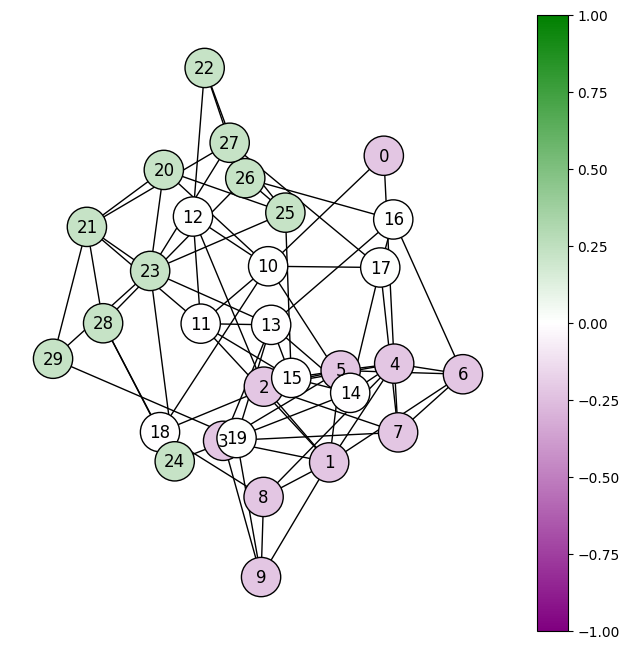

In [131]:
val = 1
val_propre = eig_vals[val]
vec_propre = eig_vecs[:,val]

plot_supragraph_laplacian(sup_G,val_propre,vec_propre,fixed_layout)

## Generate position for the node 

In [132]:
fixed_layout = nx.spring_layout(G1,seed=42,k=0.2)

In [133]:
new_fixed_layout = dict()

for i in range(10):
    y,x = list(fixed_layout.items())[i][1]
    shift = 1.8
    pos2 =  np.array([x+shift,y])
    pos3 = np.array([x+ 2*shift,y ])
    new_fixed_layout[i] = np.array([x,y])
    new_fixed_layout[i+10] = pos2
    new_fixed_layout[i+20] = pos3 

In [134]:

val = 1
val_propre = eig_vals[val]
vec_propre = eig_vecs[:,val]
print(val_propre)

1.0


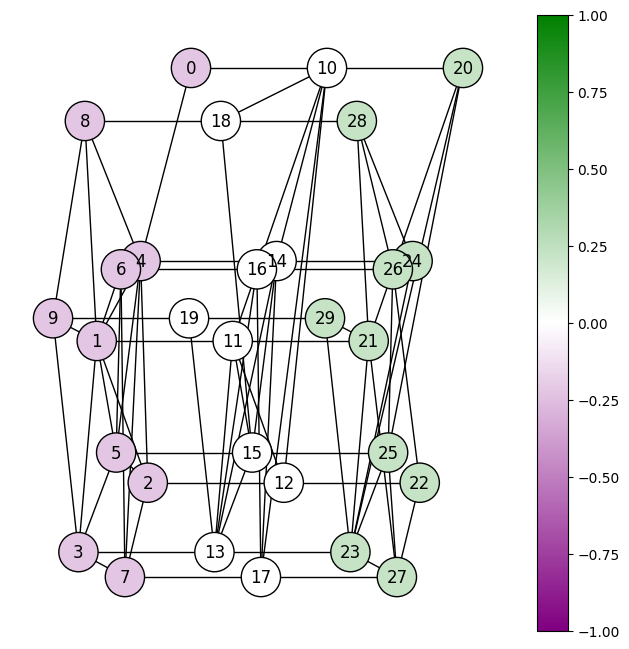

In [135]:
plot_supragraph_laplacian(sup_G,val_propre,vec_propre,new_fixed_layout)

1.4058828


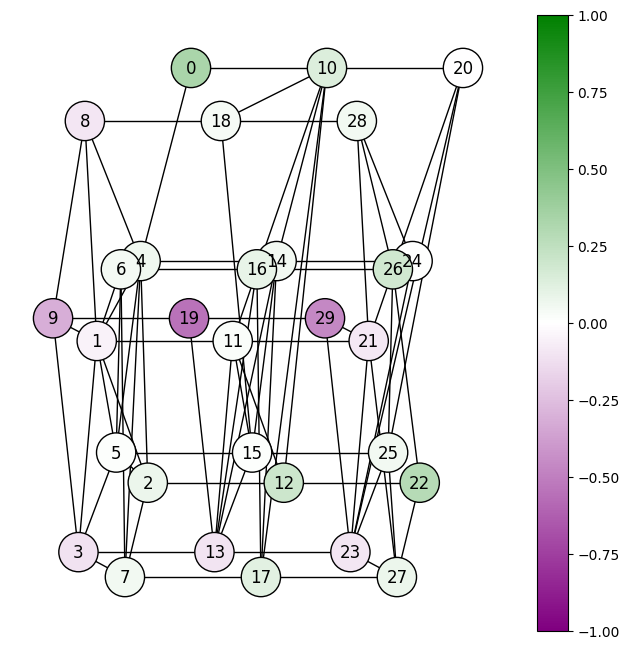

In [136]:

val = 2
val_propre = eig_vals[val]
vec_propre = eig_vecs[:,val]
plot_supragraph_laplacian(sup_G,val_propre,vec_propre,new_fixed_layout)
print(val_propre)

2.31188


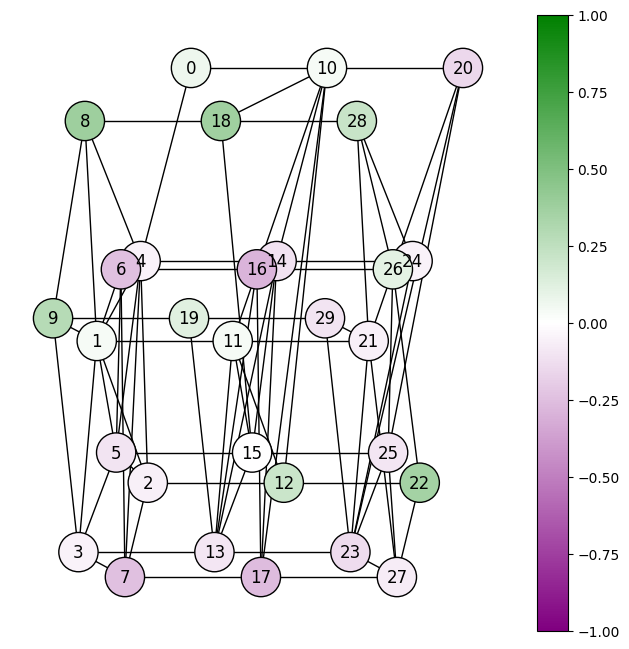

In [137]:

val = 5
val_propre = eig_vals[val]
vec_propre = eig_vecs[:,val]
plot_supragraph_laplacian(sup_G,val_propre,vec_propre,new_fixed_layout)
print(val_propre)

4.7173085


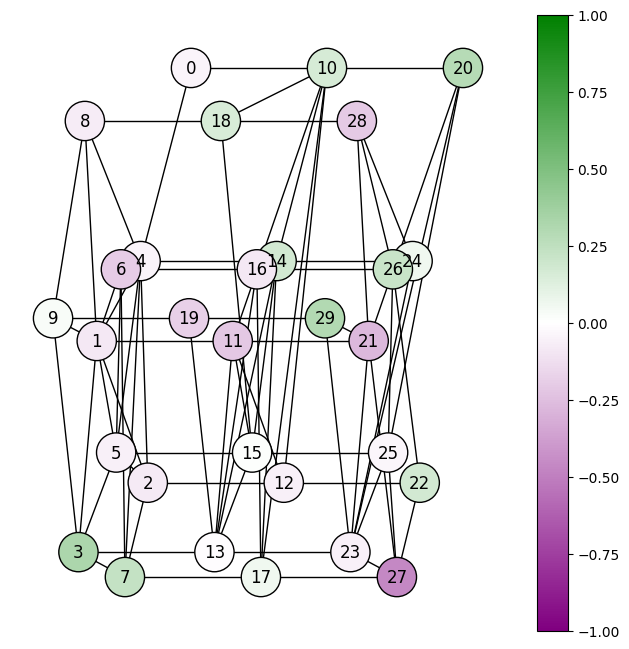

In [138]:

val = 15
val_propre = eig_vals[val]
vec_propre = eig_vecs[:,val]
plot_supragraph_laplacian(sup_G,val_propre,vec_propre,new_fixed_layout)
print(val_propre)

9.815543


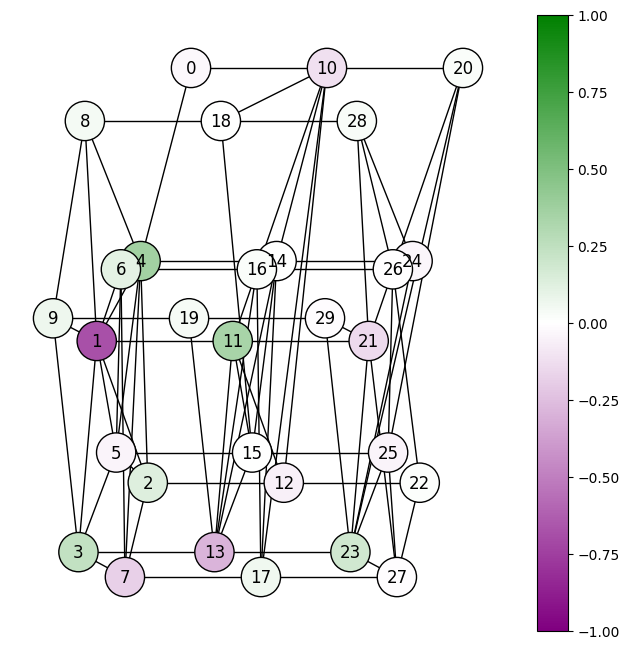

In [139]:
val = 29
val_propre = eig_vals[val]
vec_propre = eig_vecs[:,val]
plot_supragraph_laplacian(sup_G,val_propre,vec_propre,new_fixed_layout)
print(val_propre)

## Visu matrice supra-adjacence

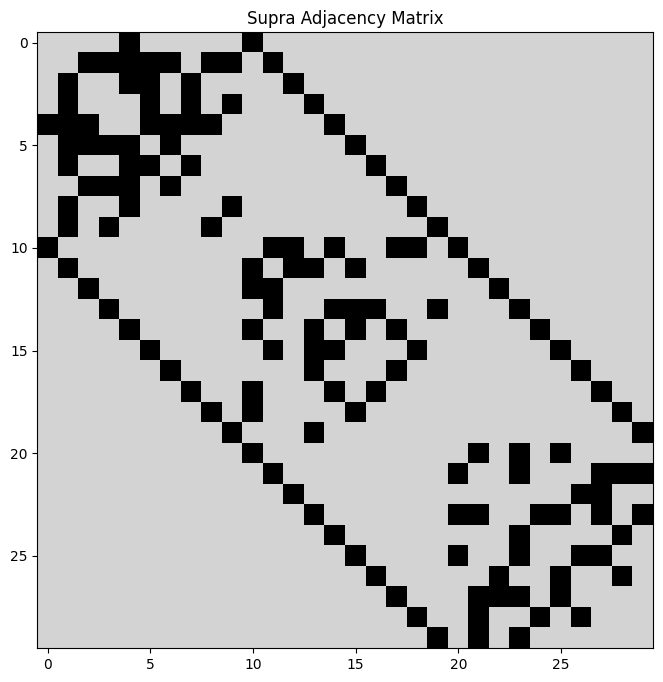

In [144]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Supposons que 'sup_adj_matrix' est votre matrice d'adjacence, 
# assurez-vous qu'elle est définie quelque part dans votre code.

# Créer une nouvelle palette de couleurs
cmap = mcolors.ListedColormap(['lightgray', 'black'])
bounds = [0, 0.5, 1.]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Afficher la matrice d'adjacence
plt.figure(figsize=(8, 8))
plt.imshow(sup_adj_matrix, interpolation='nearest', cmap=cmap, norm=norm)
plt.title('Supra Adjacency Matrix')
plt.show()